In [139]:

#import and setup hide from final report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [86]:
avg_window = 25
#Creating data sets

victoria_data['rolling_avg'] = victoria_data.iloc[0:,3].rolling(window=avg_window).mean();
global_data = pd.read_csv('global_data.csv');
global_data['rolling_avg'] = global_data.iloc[:,1].rolling(window=avg_window).mean();
cities_data = pd.read_csv('cities_data.csv');
cities_data['rolling_avg'] = cities_data.groupby('city')['avg_temp'].rolling(window=avg_window).mean().reset_index(drop=True);


In [78]:
#formatting hide this from final report

sns.set_theme(
    style="white", 
    palette='colorblind', 
    font_scale=2.0)

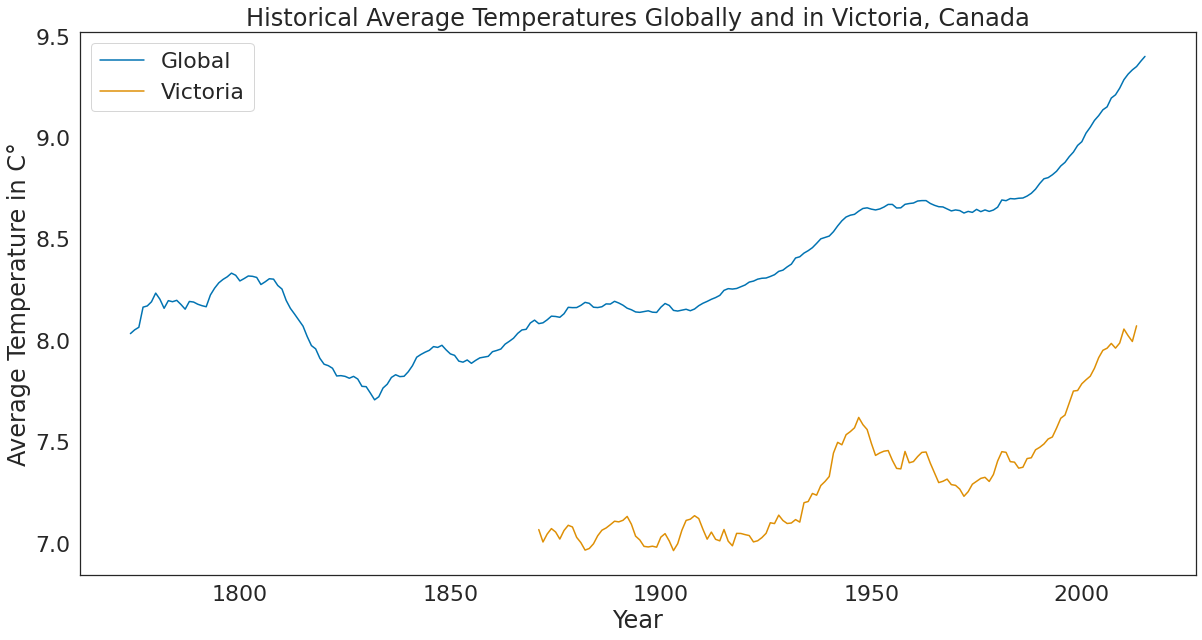

In [93]:
plt.figure(figsize=(20, 10));
plt.title("Historical Average Temperatures Globally and in Victoria, Canada")
plt.xlabel('Year')
plt.ylabel('Average Temperature in C\u00b0')

plt.plot(global_temps.year, global_temps.rolling_avg, '-');
plt.plot(victoria_data.year, victoria_data.rolling_avg, '-' );

plt.legend(['Global','Victoria']);
#plt.plot(victoria_data.year, victoria_data.avg_temp, '-');
#plt.plot(global_temps.year, global_temps.avg_temp, '-');


Text(0, 0.5, 'Average Temperature °C')

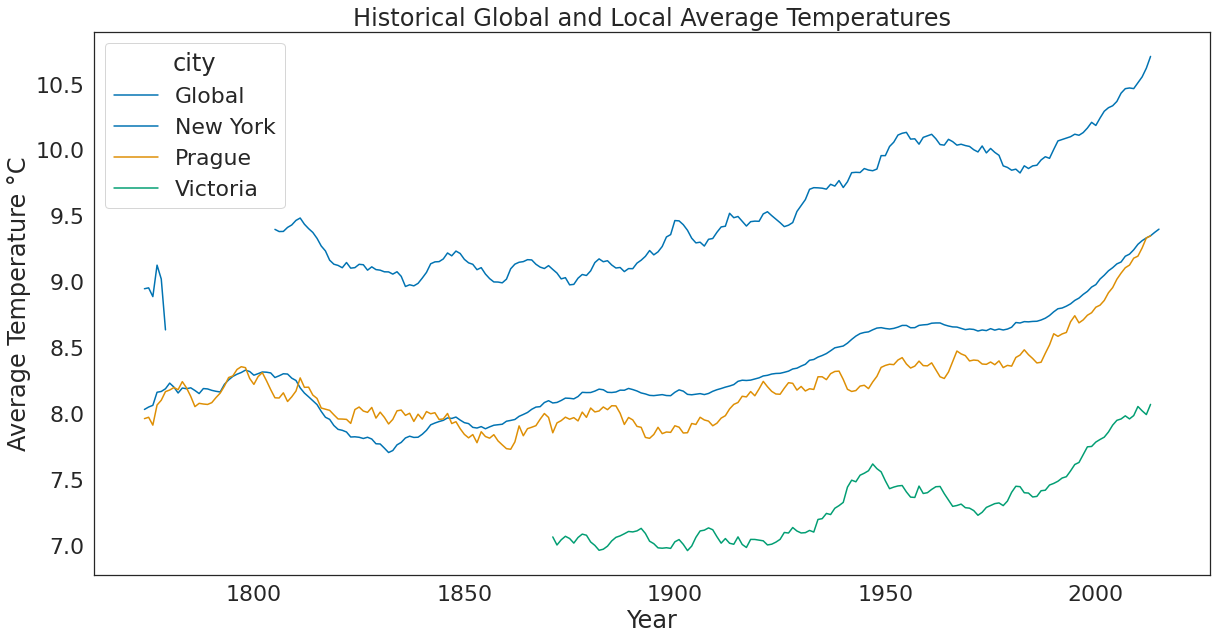

In [92]:
plt.figure(figsize=(20,10));
sns.lineplot(x=global_data.year, y=global_data.rolling_avg, label="Global");
sns.lineplot(x=cities_data.year, y=cities_data.rolling_avg, hue=cities_data.city);
plt.title("Historical Global and Local Average Temperatures")
plt.xlabel("Year");
plt.ylabel("Average Temperature °C")

# Introduction
The theory that gases in our atmosphere contribute to global temperatures was first theorized by Joseph Fourier in 1824 when he realized that solar radiation alone could not result in observed temperatures.[1] John Tyndall and Svante Arrhenius later measured the infrared absorption and emission of various gases and theorized that atmospheric composition of these gasses would result in average temperature changes.[2][3] When radioisotopic analysis became available in the mid-20th century, scientists were able to prove the human-generated carbon (as measured by carbon-14 analysis) was increasing in the atmosphere.[4] By 1959 it was projected that CO2 emissions would rise 25% by the year 2000, which could radically affect global temperatures and climate.[5]

Historical temperature data from various places around the globe exist from as early as the mid-1700s. By analyzing historical records and observing the average temperature over time, temperature change trends can be observed both globally and in localized regions. 

## Methods
The following line chart was created from global and local historical temperature records. The data was retrieved from a database using SQL and then processed using the Pandas Python library. A rolling average with a window of 25 years was calculated using the Numpy library, and then displayed using the Matplotlib library. Seaborn themes were used to style the graph.

### Data Sources

### SQL Queries Used
    - Global Query
        - SELECT * FROM global_data

    - City Queries
        - SELECT * FROM city_data
            WHERE country = 'Canada' AND city = 'Victoria';
        - SELECT * FROM city_data
	        WHERE city = 'Prague' OR city = 'Victoria' OR city = 'New York' 
            OR city = 'Wuxi' OR city = 'Sydney' OR city = 'Seol' OR city = 'San Salvador'

### Python Methods Used
 - avg_window = 25
 - global_temps['rolling_avg'] = global_temps.iloc[:,1].rolling(window=avg_window).mean()
 - victoria_data['rolling_avg'] = victoria_data.iloc[0:,3].rolling(window=avg_window).mean()
 cities_data['rolling_avg'] = cities_data.groupby('city')['avg_temp'].rolling(window=avg_window).mean().reset_index(drop=True);

### Calculations

#### Rolling average

#### Correlation Coefficient


# Observations and Discussion
1. The average global temperature has been increasing since the early 19th century, around ~1830.

    1.1. Victoria

    1.2. Other cities

2. The rate of global temperature increase over the last 25 years is greater than it has been for the rest of the available historical data.

3. While overall the temperature has been increasing since the early century, there have been periods of time when the average temperature levelled off or even slightly decreased. 

    3.1 Global and local temperatures levelled off around the 1950s before continuing to increase in the 1970s into the current period of rapid temperature rises into the present date.

        3.1.1 It has been hypothesized that specific aersols released during World War II may have caused fluctuations or masked the overall trend of global temperatures increasing during the 1950s-1970s. [6]

    3.2 There was a significant decrease in the average global temperature that occured in the early 1800s.

        3.2.1 In 1815, Mount Tambora erupted which caused the average global temperature to decrease by 0.4-0.7 °C. [7]


5. Can the global temperature predict local temperatures?

6. Comparative analysis of other cities

7. Distance from the equator?

# Conclusion

# Citations
[1] Fourier, J. (1824). "Remarques Generales sur les Temperatures Du Globe Terrestre et des Espaces Planetaires". Annales de Chimie et de Physique (in French). 27: 136–167.

[2] John Tyndall, Heat considered as a Mode of Motion (500 pages; year 1863, 1873)

[3] Held, Isaac M.; Soden, Brian J. (November 2000). "Water Vapor Feedback and Global Warming". Annual Review of Energy and the Environment. 25: 441–475.

[4] Revelle, Roger, and Hans E. Suess (1957). "Carbon Dioxide Exchange between Atmosphere and Ocean and the Question of an Increase of Atmospheric CO2 During the Past Decades." Tellus, 9: 18–27.

[5] Franta, Benjamin. "On its 100th birthday in 1959, Edward Teller warned the oil industry about global warming". The Guardian. Retrieved 11 January 2021.

[6] Booth, B. B. B. , Dunstone, N. J. , Halloran, P. R. , Andrews, T. , & Bellouin, N. (2012). Aerosols implicated as a prime driver of twentieth‐century North Atlantic climate variability. Nature, 484(7393), 228–232. https://doi.org/10.1038/nature10946 [PubMed]

[7] Schurer, Andrew P; Hegerl, Gabriele C; Luterbacher, Jürg; Brönnimann, Stefan; Cowan, Tim; Tett, Simon F B; Zanchettin, Davide; Timmreck, Claudia (September 17, 2019). "Disentangling the causes of the 1816 European year without a summer". Environmental Research Letters. 14

0      8.72
1      7.98
2      5.78
3      8.39
4      8.47
       ... 
261    9.52
262    9.51
263    9.61
264    9.57
265    9.83
Name: avg_temp, Length: 266, dtype: float64

In [144]:
c1 = cities_data[cities_data.year >= 1880][cities_data.city == "Victoria"].avg_temp
g1 = global_data[(global_data.year >= 1880) & (global_data.year <= 2013)].avg_temp

scipy.stats.pearsonr(g1, c1)[0]




<ipython-input-144-981cdfa1f625>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = cities_data[cities_data.year >= 1880][cities_data.city == "Victoria"].avg_temp


0.6030265133162296